***
# Combining Refined Datasets and Performing Additional EDA.
Capstone Project - Ali Sehpar Shikoh
***

<b> Previous Notebook: TemperatureChange-RAW

<b> Next Notebook: DataModelling

This is the 11th notebook of the project and deals with combining various refined datasets and later performing additional EDA.

### Combining Datasets.

Importing key libraries and packages.

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

Importing all the refined datasets in order to combine them in a single dataframe.

Starting off with the main dataset related to primary crops. Importing the data and looking at the head.

In [83]:
CropsRefined_df = pd.read_csv('DataFiles/02-RefinedDataFiles/Crops-REFINED.csv')
CropsRefined_df.head(2)

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),...,Primary Sugar Crops Yield (hg/ha),Rice paddy Production (tonnes),Rice paddy Area Harvested (ha),Rice paddy Yield (hg/ha),Sugar cane Production (tonnes),Sugar cane Area Harvested (ha),Sugar cane Yield (hg/ha),Total Production (tonnes),Total Area Harvested (ha),Total Yield (hg/ha)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,...,163762.413341,319000.0,210000.0,15190.47619,45000.0,1800.0,250000.0,5267700.0,4114337.0,583172.653459
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,...,195288.888889,319000.0,210000.0,15190.47619,45000.0,1800.0,250000.0,5286756.0,4226400.0,606520.850327


Importing the rest of the datasets related to livestock, manure applied, fertilizer nutrients applied to the soil, atmospheric deposition, temperature change etc., and looking at the imported dataframes.

In [84]:
LivestockRefined_df = pd.read_csv('DataFiles/02-RefinedDataFiles/Livestock-REFINED.csv')
LivestockRefined_df.head(2)

,Area Code,Area,Year,Livestock units
0,2,Afghanistan,1961,5257236.4
1,2,Afghanistan,1962,5259200.5


In [85]:
ManureAppliedRefined_df = pd.read_csv('DataFiles/02-RefinedDataFiles/ManureApplied-REFINED.csv')
ManureAppliedRefined_df.head(2)

,Area Code,Area,Year,Manure applied to soil - N content (kg)
0,2,Afghanistan,1961,5.624520e+07
1,2,Afghanistan,1962,5.704647e+07


In [86]:
NutrientsRefined_df = pd.read_csv('DataFiles/02-RefinedDataFiles/FertilizerUse-REFINED.csv')
NutrientsRefined_df.head(2)

,Area Code,Area,Year,Nitrogen Usage (Tonnes),Phosphate Usage (Tonnes),Potash Usage (Tonnes)
0,2,Afghanistan,1961,1000.0,100.0,NaN
1,2,Afghanistan,1962,1000.0,100.0,NaN


In [87]:
PopulationRefined_df = pd.read_csv('DataFiles/02-RefinedDataFiles/Population-REFINED.csv')
PopulationRefined_df.head(2)

,Area Code,Area,Year,Total Population (X 1000)
0,2,Afghanistan,1961,9169.410
1,2,Afghanistan,1962,9351.441


In [88]:
AtomDeposRefined_df = pd.read_csv('DataFiles/02-RefinedDataFiles/AtmosphericDeposition-REFINED.csv')
AtomDeposRefined_df.head(2)

,Area Code,Area,Year,Atmospheric Deposition (tonnes)
0,2,Afghanistan,1961,65189.74
1,2,Afghanistan,1962,67127.88


In [89]:
BioFixRefined_df = pd.read_csv('DataFiles/02-RefinedDataFiles/BiologicalFixation-REFINED.csv')
BioFixRefined_df.head(2)

,Area Code,Area,Year,Biological Fixation (tonnes)
0,3,Albania,1961,277.41
1,3,Albania,1962,267.87


In [90]:
CropRemovalRefined_df = pd.read_csv('DataFiles/02-RefinedDataFiles/CropRemoval-REFINED.csv')
CropRemovalRefined_df.head(2)

,Area Code,Area,Year,Crop Removal (tonnes)
0,2,Afghanistan,1961,74154.2000
1,2,Afghanistan,1962,75966.9064


In [91]:
RndWoodProdRefined_df = pd.read_csv('DataFiles/02-RefinedDataFiles/RoundwoodProduction-REFINED.csv')
RndWoodProdRefined_df.head(2)

,Area Code,Area,Year,Roundwood Production (m3)
0,2,Afghanistan,1961,1354291
1,2,Afghanistan,1962,1371568


In [92]:
TemperatureChangeRefined_df = pd.read_csv('DataFiles/02-RefinedDataFiles/TemperatureChange-REFINED.csv')
TemperatureChangeRefined_df.head(2)

,Area Code,Area,Year,Temperature Change (°C)
0,2,Afghanistan,1961,-0.121
1,2,Afghanistan,1962,-0.171


Since refined dataframe related to crops is the main dataset, therefore it will be recalled first. All the remaining refined datasets will be joined with this dataset. Implementing a left join and joining livestock dataframe based on 'Area Code', 'Year' and 'Area'.

In [93]:
Main_df1 = CropsRefined_df.merge(LivestockRefined_df, how='left', left_on=["Area Code", "Year", 'Area'], right_on=["Area Code", "Year", 'Area'])
Main_df1.head(2)

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),...,Rice paddy Production (tonnes),Rice paddy Area Harvested (ha),Rice paddy Yield (hg/ha),Sugar cane Production (tonnes),Sugar cane Area Harvested (ha),Sugar cane Yield (hg/ha),Total Production (tonnes),Total Area Harvested (ha),Total Yield (hg/ha),Livestock units
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,...,319000.0,210000.0,15190.47619,45000.0,1800.0,250000.0,5267700.0,4114337.0,583172.653459,5257236.4
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,...,319000.0,210000.0,15190.47619,45000.0,1800.0,250000.0,5286756.0,4226400.0,606520.850327,5259200.5


Merging the manure applied dataframe with 'Main_df1' on the basis of 'Area Code', 'Year' and 'Area'.

In [94]:
Main_df2 = Main_df1.merge(ManureAppliedRefined_df, how='left', left_on=["Area Code", "Year", 'Area'], right_on=["Area Code", "Year", 'Area'])
Main_df2

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),...,Rice paddy Area Harvested (ha),Rice paddy Yield (hg/ha),Sugar cane Production (tonnes),Sugar cane Area Harvested (ha),Sugar cane Yield (hg/ha),Total Production (tonnes),Total Area Harvested (ha),Total Yield (hg/ha),Livestock units,Manure applied to soil - N content (kg)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,...,210000.0,15190.476190,45000.0,1800.0,250000.000000,5267700.0,4114337.0,5.831727e+05,5257236.40,5.624520e+07
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,...,210000.0,15190.476190,45000.0,1800.0,250000.000000,5286756.0,4226400.0,6.065209e+05,5259200.50,5.704647e+07
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333,3378000.0,...,210000.0,15190.476190,45000.0,1800.0,250000.000000,5002825.0,4227400.0,6.053449e+05,5471475.75,5.859424e+07
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000,3732000.0,...,220000.0,17272.727273,45000.0,1800.0,250000.000000,5424900.0,4267300.0,5.682812e+05,5597970.00,5.980591e+07
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000,3785000.0,...,220000.0,17272.727273,51000.0,2000.0,255000.000000,5532500.0,4267200.0,6.088503e+05,5734080.00,6.162054e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746,676748.0,...,3780.0,3428.571429,3483000.0,43500.0,800689.655172,8673578.0,2905247.0,1.728082e+06,3557201.40,1.655674e+07
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451,1748001.0,...,4054.0,3288.110508,3101000.0,41000.0,756341.463415,10000112.0,2738085.0,1.654091e+06,3518697.90,1.395568e+07
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426,1777331.0,...,4153.0,3248.254274,3582994.0,45000.0,796220.888889,11026268.0,2778952.0,1.734386e+06,3556852.90,1.357950e+07
11054,181,Zimbabwe,2019,228963.0,33483.0,68381.865424,297614.0,65824.0,45213.599903,665633.0,...,3996.0,3318.318318,3562000.0,46000.0,774347.826087,8826858.0,1210371.0,1.688717e+06,3613308.50,1.483084e+07


Joining the fertilizer nutrient dataframe.

In [95]:
Main_df3 = Main_df2.merge(NutrientsRefined_df, how='left', left_on=["Area Code", "Year", 'Area'], right_on=["Area Code", "Year", 'Area'])
Main_df3

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),...,Sugar cane Area Harvested (ha),Sugar cane Yield (hg/ha),Total Production (tonnes),Total Area Harvested (ha),Total Yield (hg/ha),Livestock units,Manure applied to soil - N content (kg),Nitrogen Usage (Tonnes),Phosphate Usage (Tonnes),Potash Usage (Tonnes)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,...,1800.0,250000.000000,5267700.0,4114337.0,5.831727e+05,5257236.40,5.624520e+07,1000.0,100.0,NaN
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,...,1800.0,250000.000000,5286756.0,4226400.0,6.065209e+05,5259200.50,5.704647e+07,1000.0,100.0,NaN
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333,3378000.0,...,1800.0,250000.000000,5002825.0,4227400.0,6.053449e+05,5471475.75,5.859424e+07,1000.0,100.0,NaN
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000,3732000.0,...,1800.0,250000.000000,5424900.0,4267300.0,5.682812e+05,5597970.00,5.980591e+07,1000.0,100.0,NaN
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000,3785000.0,...,2000.0,255000.000000,5532500.0,4267200.0,6.088503e+05,5734080.00,6.162054e+07,1000.0,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746,676748.0,...,43500.0,800689.655172,8673578.0,2905247.0,1.728082e+06,3557201.40,1.655674e+07,58100.0,39000.0,33200.0
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451,1748001.0,...,41000.0,756341.463415,10000112.0,2738085.0,1.654091e+06,3518697.90,1.395568e+07,65000.0,41400.0,40000.0
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426,1777331.0,...,45000.0,796220.888889,11026268.0,2778952.0,1.734386e+06,3556852.90,1.357950e+07,50100.0,45800.0,36900.0
11054,181,Zimbabwe,2019,228963.0,33483.0,68381.865424,297614.0,65824.0,45213.599903,665633.0,...,46000.0,774347.826087,8826858.0,1210371.0,1.688717e+06,3613308.50,1.483084e+07,50100.0,45800.0,36900.0


Joining atmospheric deposition dataframe.

In [96]:
Main_df4 = Main_df3.merge(AtomDeposRefined_df, how='left', left_on=["Area Code", "Year", 'Area'], right_on=["Area Code", "Year", 'Area'])
Main_df4

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),...,Sugar cane Yield (hg/ha),Total Production (tonnes),Total Area Harvested (ha),Total Yield (hg/ha),Livestock units,Manure applied to soil - N content (kg),Nitrogen Usage (Tonnes),Phosphate Usage (Tonnes),Potash Usage (Tonnes),Atmospheric Deposition (tonnes)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,...,250000.000000,5267700.0,4114337.0,5.831727e+05,5257236.40,5.624520e+07,1000.0,100.0,NaN,65189.7400
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,...,250000.000000,5286756.0,4226400.0,6.065209e+05,5259200.50,5.704647e+07,1000.0,100.0,NaN,67127.8800
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333,3378000.0,...,250000.000000,5002825.0,4227400.0,6.053449e+05,5471475.75,5.859424e+07,1000.0,100.0,NaN,68986.5110
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000,3732000.0,...,250000.000000,5424900.0,4267300.0,5.682812e+05,5597970.00,5.980591e+07,1000.0,100.0,NaN,70987.6918
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000,3785000.0,...,255000.000000,5532500.0,4267200.0,6.088503e+05,5734080.00,6.162054e+07,1000.0,100.0,NaN,72446.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746,676748.0,...,800689.655172,8673578.0,2905247.0,1.728082e+06,3557201.40,1.655674e+07,58100.0,39000.0,33200.0,18855.9000
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451,1748001.0,...,756341.463415,10000112.0,2738085.0,1.654091e+06,3518697.90,1.395568e+07,65000.0,41400.0,40000.0,18855.9000
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426,1777331.0,...,796220.888889,11026268.0,2778952.0,1.734386e+06,3556852.90,1.357950e+07,50100.0,45800.0,36900.0,18855.9000
11054,181,Zimbabwe,2019,228963.0,33483.0,68381.865424,297614.0,65824.0,45213.599903,665633.0,...,774347.826087,8826858.0,1210371.0,1.688717e+06,3613308.50,1.483084e+07,50100.0,45800.0,36900.0,NaN


Combining the biofixation dataframe.

In [97]:
Main_df5 = Main_df4.merge(BioFixRefined_df, how='left', left_on=["Area Code", "Year", 'Area'], right_on=["Area Code", "Year", 'Area'])
Main_df5

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),...,Total Production (tonnes),Total Area Harvested (ha),Total Yield (hg/ha),Livestock units,Manure applied to soil - N content (kg),Nitrogen Usage (Tonnes),Phosphate Usage (Tonnes),Potash Usage (Tonnes),Atmospheric Deposition (tonnes),Biological Fixation (tonnes)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,...,5267700.0,4114337.0,5.831727e+05,5257236.40,5.624520e+07,1000.0,100.0,NaN,65189.7400,NaN
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,...,5286756.0,4226400.0,6.065209e+05,5259200.50,5.704647e+07,1000.0,100.0,NaN,67127.8800,NaN
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333,3378000.0,...,5002825.0,4227400.0,6.053449e+05,5471475.75,5.859424e+07,1000.0,100.0,NaN,68986.5110,NaN
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000,3732000.0,...,5424900.0,4267300.0,5.682812e+05,5597970.00,5.980591e+07,1000.0,100.0,NaN,70987.6918,NaN
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000,3785000.0,...,5532500.0,4267200.0,6.088503e+05,5734080.00,6.162054e+07,1000.0,100.0,NaN,72446.0625,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746,676748.0,...,8673578.0,2905247.0,1.728082e+06,3557201.40,1.655674e+07,58100.0,39000.0,33200.0,18855.9000,6500.15
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451,1748001.0,...,10000112.0,2738085.0,1.654091e+06,3518697.90,1.395568e+07,65000.0,41400.0,40000.0,18855.9000,7971.18
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426,1777331.0,...,11026268.0,2778952.0,1.734386e+06,3556852.90,1.357950e+07,50100.0,45800.0,36900.0,18855.9000,9717.04
11054,181,Zimbabwe,2019,228963.0,33483.0,68381.865424,297614.0,65824.0,45213.599903,665633.0,...,8826858.0,1210371.0,1.688717e+06,3613308.50,1.483084e+07,50100.0,45800.0,36900.0,NaN,NaN


Merging refined crop removal dataframe.

In [98]:
Main_df6 = Main_df5.merge(CropRemovalRefined_df, how='left', left_on=["Area Code", "Year", 'Area'], right_on=["Area Code", "Year", 'Area'])
Main_df6

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),...,Total Area Harvested (ha),Total Yield (hg/ha),Livestock units,Manure applied to soil - N content (kg),Nitrogen Usage (Tonnes),Phosphate Usage (Tonnes),Potash Usage (Tonnes),Atmospheric Deposition (tonnes),Biological Fixation (tonnes),Crop Removal (tonnes)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,...,4114337.0,5.831727e+05,5257236.40,5.624520e+07,1000.0,100.0,NaN,65189.7400,NaN,74154.2000
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,...,4226400.0,6.065209e+05,5259200.50,5.704647e+07,1000.0,100.0,NaN,67127.8800,NaN,75966.9064
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333,3378000.0,...,4227400.0,6.053449e+05,5471475.75,5.859424e+07,1000.0,100.0,NaN,68986.5110,NaN,71302.8675
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000,3732000.0,...,4267300.0,5.682812e+05,5597970.00,5.980591e+07,1000.0,100.0,NaN,70987.6918,NaN,76253.3200
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000,3785000.0,...,4267200.0,6.088503e+05,5734080.00,6.162054e+07,1000.0,100.0,NaN,72446.0625,NaN,77364.1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746,676748.0,...,2905247.0,1.728082e+06,3557201.40,1.655674e+07,58100.0,39000.0,33200.0,18855.9000,6500.15,26201.6590
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451,1748001.0,...,2738085.0,1.654091e+06,3518697.90,1.395568e+07,65000.0,41400.0,40000.0,18855.9000,7971.18,32794.6510
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426,1777331.0,...,2778952.0,1.734386e+06,3556852.90,1.357950e+07,50100.0,45800.0,36900.0,18855.9000,9717.04,31543.9736
11054,181,Zimbabwe,2019,228963.0,33483.0,68381.865424,297614.0,65824.0,45213.599903,665633.0,...,1210371.0,1.688717e+06,3613308.50,1.483084e+07,50100.0,45800.0,36900.0,NaN,NaN,NaN


Merging refined roundwood dataframe with the above dataframe.

In [99]:
Main_df7 = Main_df6.merge(RndWoodProdRefined_df, how='left', left_on=["Area Code", "Year", 'Area'], right_on=["Area Code", "Year", 'Area'])
Main_df7

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),...,Total Yield (hg/ha),Livestock units,Manure applied to soil - N content (kg),Nitrogen Usage (Tonnes),Phosphate Usage (Tonnes),Potash Usage (Tonnes),Atmospheric Deposition (tonnes),Biological Fixation (tonnes),Crop Removal (tonnes),Roundwood Production (m3)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,...,5.831727e+05,5257236.40,5.624520e+07,1000.0,100.0,NaN,65189.7400,NaN,74154.2000,1354291.0
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,...,6.065209e+05,5259200.50,5.704647e+07,1000.0,100.0,NaN,67127.8800,NaN,75966.9064,1371568.0
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333,3378000.0,...,6.053449e+05,5471475.75,5.859424e+07,1000.0,100.0,NaN,68986.5110,NaN,71302.8675,1414937.0
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000,3732000.0,...,5.682812e+05,5597970.00,5.980591e+07,1000.0,100.0,NaN,70987.6918,NaN,76253.3200,1533399.0
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000,3785000.0,...,6.088503e+05,5734080.00,6.162054e+07,1000.0,100.0,NaN,72446.0625,NaN,77364.1100,1596956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746,676748.0,...,1.728082e+06,3557201.40,1.655674e+07,58100.0,39000.0,33200.0,18855.9000,6500.15,26201.6590,9806850.0
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451,1748001.0,...,1.654091e+06,3518697.90,1.395568e+07,65000.0,41400.0,40000.0,18855.9000,7971.18,32794.6510,9801056.0
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426,1777331.0,...,1.734386e+06,3556852.90,1.357950e+07,50100.0,45800.0,36900.0,18855.9000,9717.04,31543.9736,9920009.0
11054,181,Zimbabwe,2019,228963.0,33483.0,68381.865424,297614.0,65824.0,45213.599903,665633.0,...,1.688717e+06,3613308.50,1.483084e+07,50100.0,45800.0,36900.0,NaN,NaN,NaN,9983350.0


Combining the refined population dataframe.

In [100]:
Main_df8 = Main_df7.merge(PopulationRefined_df, how='left', left_on=["Area Code", "Year", 'Area'], right_on=["Area Code", "Year", 'Area'])
Main_df8

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),...,Livestock units,Manure applied to soil - N content (kg),Nitrogen Usage (Tonnes),Phosphate Usage (Tonnes),Potash Usage (Tonnes),Atmospheric Deposition (tonnes),Biological Fixation (tonnes),Crop Removal (tonnes),Roundwood Production (m3),Total Population (X 1000)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,...,5257236.40,5.624520e+07,1000.0,100.0,NaN,65189.7400,NaN,74154.2000,1354291.0,9169.410
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,...,5259200.50,5.704647e+07,1000.0,100.0,NaN,67127.8800,NaN,75966.9064,1371568.0,9351.441
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333,3378000.0,...,5471475.75,5.859424e+07,1000.0,100.0,NaN,68986.5110,NaN,71302.8675,1414937.0,9543.205
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000,3732000.0,...,5597970.00,5.980591e+07,1000.0,100.0,NaN,70987.6918,NaN,76253.3200,1533399.0,9744.781
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000,3785000.0,...,5734080.00,6.162054e+07,1000.0,100.0,NaN,72446.0625,NaN,77364.1100,1596956.0,9956.320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746,676748.0,...,3557201.40,1.655674e+07,58100.0,39000.0,33200.0,18855.9000,6500.15,26201.6590,9806850.0,14030.331
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451,1748001.0,...,3518697.90,1.395568e+07,65000.0,41400.0,40000.0,18855.9000,7971.18,32794.6510,9801056.0,14236.595
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426,1777331.0,...,3556852.90,1.357950e+07,50100.0,45800.0,36900.0,18855.9000,9717.04,31543.9736,9920009.0,14438.802
11054,181,Zimbabwe,2019,228963.0,33483.0,68381.865424,297614.0,65824.0,45213.599903,665633.0,...,3613308.50,1.483084e+07,50100.0,45800.0,36900.0,NaN,NaN,NaN,9983350.0,14645.468


Merging the cleaned temperature change dataframe. Also since majority of the data is from year 1961 to 2019, therefore it is recommended to filter data while keeping the above timestamp in mind. Executing a filter as well.

In [101]:
Main_df9 = Main_df8.merge(TemperatureChangeRefined_df, how='left', left_on=["Area Code", "Year", 'Area'], right_on=["Area Code", "Year", 'Area'])
Main_df9 = Main_df9.loc[(Main_df5['Year'] >= 1961) & (Main_df5['Year'] <= 2019)]
Main_df9

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),...,Manure applied to soil - N content (kg),Nitrogen Usage (Tonnes),Phosphate Usage (Tonnes),Potash Usage (Tonnes),Atmospheric Deposition (tonnes),Biological Fixation (tonnes),Crop Removal (tonnes),Roundwood Production (m3),Total Population (X 1000),Temperature Change (°C)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,...,5.624520e+07,1000.0,100.0,NaN,65189.7400,NaN,74154.2000,1354291.0,9169.410,-0.121
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,...,5.704647e+07,1000.0,100.0,NaN,67127.8800,NaN,75966.9064,1371568.0,9351.441,-0.171
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333,3378000.0,...,5.859424e+07,1000.0,100.0,NaN,68986.5110,NaN,71302.8675,1414937.0,9543.205,0.841
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000,3732000.0,...,5.980591e+07,1000.0,100.0,NaN,70987.6918,NaN,76253.3200,1533399.0,9744.781,-0.779
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000,3785000.0,...,6.162054e+07,1000.0,100.0,NaN,72446.0625,NaN,77364.1100,1596956.0,9956.320,-0.254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,181,Zimbabwe,2015,226489.0,34067.0,66483.400358,284140.0,64226.0,44240.650204,800286.0,...,1.520726e+07,42600.0,23000.0,13000.0,18855.9000,6420.84,28149.5661,9744786.0,13814.629,1.226
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746,676748.0,...,1.655674e+07,58100.0,39000.0,33200.0,18855.9000,6500.15,26201.6590,9806850.0,14030.331,1.470
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451,1748001.0,...,1.395568e+07,65000.0,41400.0,40000.0,18855.9000,7971.18,32794.6510,9801056.0,14236.595,0.443
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426,1777331.0,...,1.357950e+07,50100.0,45800.0,36900.0,18855.9000,9717.04,31543.9736,9920009.0,14438.802,0.747


The merged dataset contains a total of 10861 rows and 38 columns. The dataset will be reduced to 15 columns once the columns that are used to calculate Total Yield column. However, this will be done after EDA has been carried out.

### Additional EDA and Data Processing

Checking out the dataframe for null values.

In [102]:
Main_df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10861 entries, 0 to 11054
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Area Code                                   10861 non-null  int64  
 1   Area                                        10861 non-null  object 
 2   Year                                        10861 non-null  int64  
 3   Primary Vegetables Production (tonnes)      10861 non-null  float64
 4   Primary Vegetables Area Harvested (ha)      10861 non-null  float64
 5   Primary Vegetables Yield (hg/ha)            10861 non-null  float64
 6   Total Roots and Tubers Production (tonnes)  10861 non-null  float64
 7   Total Roots and Tubers Area Harvested (ha)  10861 non-null  float64
 8   Total Roots and Tubers Yield (hg/ha)        10861 non-null  float64
 9   Total Cereals Production (tonnes)           10861 non-null  float64
 10  Total Cere

Plotting null value heatmap in order to check the position of the null values.

<AxesSubplot:>

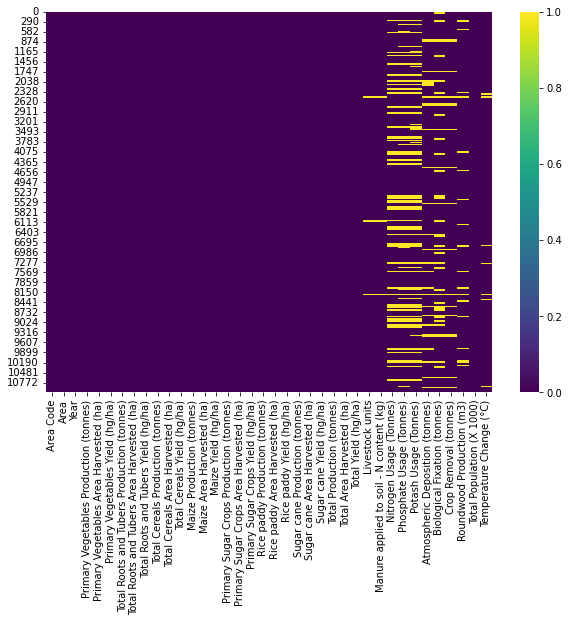

In [103]:
plt.figure(figsize=(10,7))
sns.heatmap (Main_df9.isnull(), cmap='viridis')

As seen, the null values are contained in numerous columns right at the end. The columns related to the merged dataset 'Crops-REFINED.csv' do not contain any null values as the null values have already been addressed in the 'Crops-RAW.ipynb' notebook. The end columns' null values are not restricted to the head or tail of the dataset, rather, they are visible throughout the dataset body.

It is believed that FAO collects majority of the data for key countries having higher stakes when it comes to crop production. Thus there is predominant chance that the null values belong to smaller countries that do not have a profound impact on the crop production. In addition, some small countries (like isolated island countries in the South Atlantic Ocean) might have a negligible used of a specific fertilizers or may not have any livestock. This might be true for other variables as well. Confirming if that is the case.

In [104]:
Main_df9[Main_df9.isna().any(axis=1)]

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),...,Manure applied to soil - N content (kg),Nitrogen Usage (Tonnes),Phosphate Usage (Tonnes),Potash Usage (Tonnes),Atmospheric Deposition (tonnes),Biological Fixation (tonnes),Crop Removal (tonnes),Roundwood Production (m3),Total Population (X 1000),Temperature Change (°C)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,...,5.624520e+07,1000.00,100.00,NaN,65189.7400,NaN,74154.2000,1354291.0,9169.410,-0.121
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,...,5.704647e+07,1000.00,100.00,NaN,67127.8800,NaN,75966.9064,1371568.0,9351.441,-0.171
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333,3378000.0,...,5.859424e+07,1000.00,100.00,NaN,68986.5110,NaN,71302.8675,1414937.0,9543.205,0.841
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000,3732000.0,...,5.980591e+07,1000.00,100.00,NaN,70987.6918,NaN,76253.3200,1533399.0,9744.781,-0.779
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000,3785000.0,...,6.162054e+07,1000.00,100.00,NaN,72446.0625,NaN,77364.1100,1596956.0,9956.320,-0.254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10933,248,Yugoslav SFR,1989,2062757.0,243770.0,84618.985109,2361422.0,294410.0,80208.620631,16109089.0,...,3.093660e+08,443700.00,231229.00,180000.0,NaN,NaN,NaN,15541000.0,23352.122,0.412
10934,248,Yugoslav SFR,1990,1791597.0,233678.0,76669.476801,2188300.0,292768.0,74745.190731,14165349.0,...,3.045837e+08,441700.00,196100.00,190000.0,NaN,NaN,NaN,12686000.0,23375.107,1.003
10935,248,Yugoslav SFR,1991,2074286.0,237089.0,87489.761229,2525383.0,284512.0,88761.915139,19262686.0,...,2.984505e+08,288000.00,139000.00,154300.0,NaN,NaN,NaN,11413000.0,23349.025,-0.107
10994,251,Zambia,2019,434613.0,55663.0,78079.334567,4184706.0,156226.0,267862.327654,2223127.0,...,2.510371e+07,167640.43,49348.65,39798.2,NaN,NaN,NaN,25725000.0,17861.030,1.310


As seen there are a total of 4128 rows that contain null values, this number of null value rows is unprecedented and thus needs to be addressed. As seen above the number of Nan rows predominantly belong smaller countries and thus filling the NaN rows with 0 would not make any drastic difference.

Before equating NaN values to 0 lets visualize the correlation between the number of missing values in different columns as a heatmap.

<AxesSubplot:>

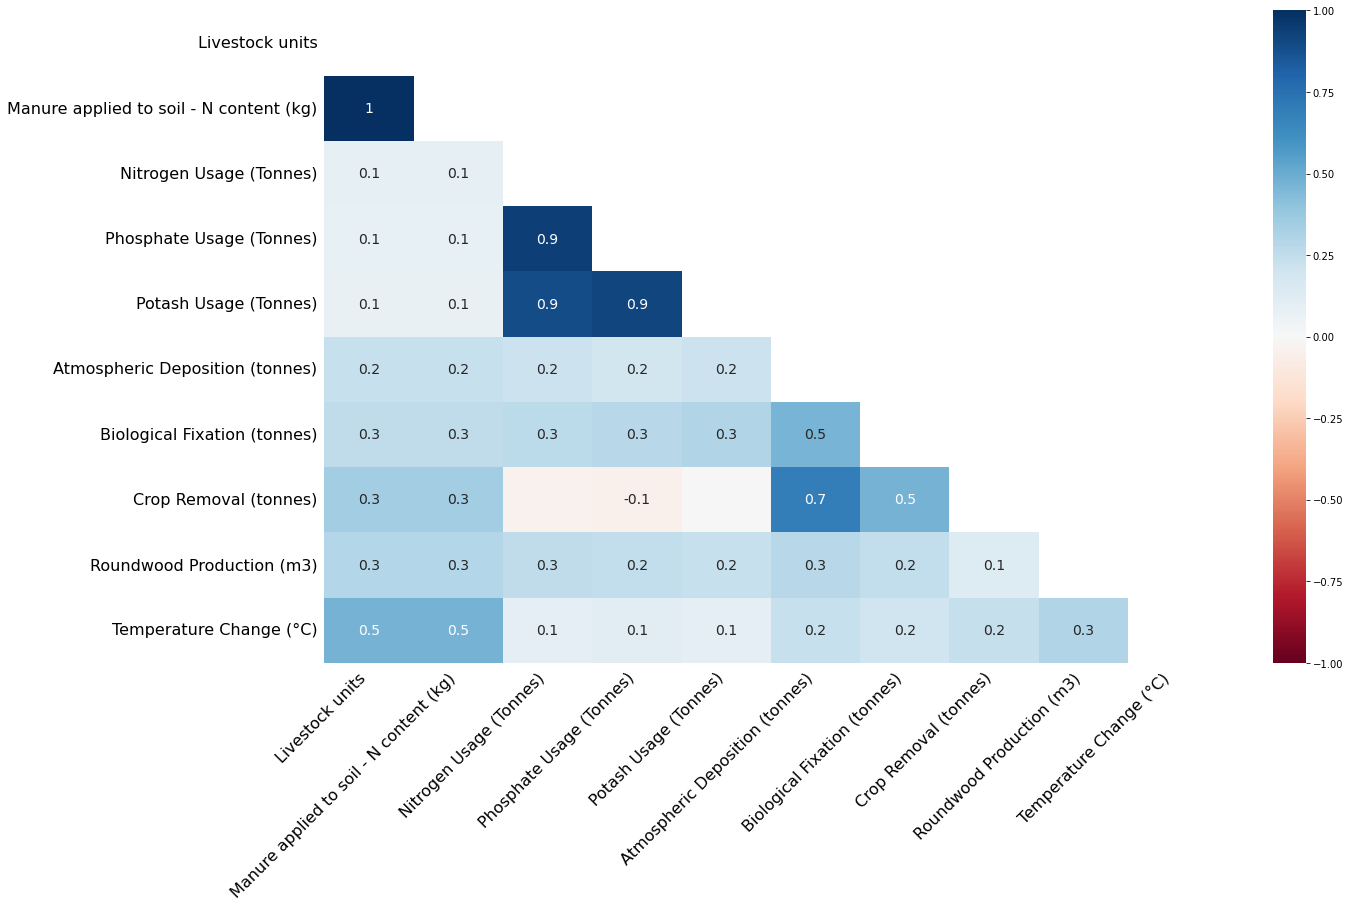

In [105]:
msno.heatmap(Main_df9)

There seems to be a correlation between the NaN values existing between the fertilizer nutrients as well as between livestock and manure applied to the soil. This might means that if a nan value occurs in Livestock column there is predominant chance of seeing a nan value in the manure applied column.

Replacing the nan values by 0 in the above dataset as rechecking the dataset.

In [106]:
Main_df9['Livestock units'] = Main_df9['Livestock units'].fillna(0)
Main_df9['Manure applied to soil - N content (kg)'] = Main_df9['Manure applied to soil - N content (kg)'].fillna(0)
Main_df9['Nitrogen Usage (Tonnes)'] = Main_df9['Nitrogen Usage (Tonnes)'].fillna(0)
Main_df9['Phosphate Usage (Tonnes)'] = Main_df9['Phosphate Usage (Tonnes)'].fillna(0)
Main_df9['Potash Usage (Tonnes)'] = Main_df9['Potash Usage (Tonnes)'].fillna(0)
Main_df9['Atmospheric Deposition (tonnes)'] = Main_df9['Atmospheric Deposition (tonnes)'].fillna(0)
Main_df9['Biological Fixation (tonnes)'] = Main_df9['Biological Fixation (tonnes)'].fillna(0)
Main_df9['Crop Removal (tonnes)'] = Main_df9['Crop Removal (tonnes)'].fillna(0)
Main_df9['Roundwood Production (m3)'] = Main_df9['Roundwood Production (m3)'].fillna(0)
Main_df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10861 entries, 0 to 11054
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Area Code                                   10861 non-null  int64  
 1   Area                                        10861 non-null  object 
 2   Year                                        10861 non-null  int64  
 3   Primary Vegetables Production (tonnes)      10861 non-null  float64
 4   Primary Vegetables Area Harvested (ha)      10861 non-null  float64
 5   Primary Vegetables Yield (hg/ha)            10861 non-null  float64
 6   Total Roots and Tubers Production (tonnes)  10861 non-null  float64
 7   Total Roots and Tubers Area Harvested (ha)  10861 non-null  float64
 8   Total Roots and Tubers Yield (hg/ha)        10861 non-null  float64
 9   Total Cereals Production (tonnes)           10861 non-null  float64
 10  Total Cere

As seen all there are no rows containing null columns.

Since statistics related to population and temperature change cannot be zero. Therefore it is better to drop null value rows specific to these columns.

In [107]:
Main_df9 = Main_df9.dropna()
Main_df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10538 entries, 0 to 11054
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Area Code                                   10538 non-null  int64  
 1   Area                                        10538 non-null  object 
 2   Year                                        10538 non-null  int64  
 3   Primary Vegetables Production (tonnes)      10538 non-null  float64
 4   Primary Vegetables Area Harvested (ha)      10538 non-null  float64
 5   Primary Vegetables Yield (hg/ha)            10538 non-null  float64
 6   Total Roots and Tubers Production (tonnes)  10538 non-null  float64
 7   Total Roots and Tubers Area Harvested (ha)  10538 non-null  float64
 8   Total Roots and Tubers Yield (hg/ha)        10538 non-null  float64
 9   Total Cereals Production (tonnes)           10538 non-null  float64
 10  Total Cere

As seen above less than 350 rows were dropped.

Checking for infinite values in the 'Total Yield' column as it the only calculated column in the dataset and might contain infinite value.

In [108]:
count = np.isinf(Main_df9['Total Yield (hg/ha)']).values.sum()
count

3

As seen above there are a total of 3 infinite values 'Total Yield' column and addressing them is quite important in order to avoid errors. The rows containing infinite values can be dropped by replacing the infinite values with null values and later dropping the null columns.

In [109]:
# Replace infinite updated data with nan
Main_df9.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
Main_df9.dropna(inplace=True)
Main_df9

C:\Users\User\AppData\Local\Temp\ipykernel_15948\3735384030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Main_df9.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15948\3735384030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Main_df9.dropna(inplace=True)


,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),...,Manure applied to soil - N content (kg),Nitrogen Usage (Tonnes),Phosphate Usage (Tonnes),Potash Usage (Tonnes),Atmospheric Deposition (tonnes),Biological Fixation (tonnes),Crop Removal (tonnes),Roundwood Production (m3),Total Population (X 1000),Temperature Change (°C)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,...,5.624520e+07,1000.0,100.0,0.0,65189.7400,0.00,74154.2000,1354291.0,9169.410,-0.121
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,...,5.704647e+07,1000.0,100.0,0.0,67127.8800,0.00,75966.9064,1371568.0,9351.441,-0.171
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333,3378000.0,...,5.859424e+07,1000.0,100.0,0.0,68986.5110,0.00,71302.8675,1414937.0,9543.205,0.841
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000,3732000.0,...,5.980591e+07,1000.0,100.0,0.0,70987.6918,0.00,76253.3200,1533399.0,9744.781,-0.779
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000,3785000.0,...,6.162054e+07,1000.0,100.0,0.0,72446.0625,0.00,77364.1100,1596956.0,9956.320,-0.254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,181,Zimbabwe,2015,226489.0,34067.0,66483.400358,284140.0,64226.0,44240.650204,800286.0,...,1.520726e+07,42600.0,23000.0,13000.0,18855.9000,6420.84,28149.5661,9744786.0,13814.629,1.226
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746,676748.0,...,1.655674e+07,58100.0,39000.0,33200.0,18855.9000,6500.15,26201.6590,9806850.0,14030.331,1.470
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451,1748001.0,...,1.395568e+07,65000.0,41400.0,40000.0,18855.9000,7971.18,32794.6510,9801056.0,14236.595,0.443
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426,1777331.0,...,1.357950e+07,50100.0,45800.0,36900.0,18855.9000,9717.04,31543.9736,9920009.0,14438.802,0.747


Rechecking there are any remaining infinite values in the 'Total Yield' column.

In [110]:
count = np.isinf(Main_df9['Total Yield (hg/ha)']).values.sum()
count

0

The dataset is now in a combined form and free of null values. Thus, it is now ready for additional exploratory data analysis and for the construction of various graphs. But before that lets check if all the data columns have appropriate data types.

In [111]:
Main_df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10535 entries, 0 to 11054
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Area Code                                   10535 non-null  int64  
 1   Area                                        10535 non-null  object 
 2   Year                                        10535 non-null  int64  
 3   Primary Vegetables Production (tonnes)      10535 non-null  float64
 4   Primary Vegetables Area Harvested (ha)      10535 non-null  float64
 5   Primary Vegetables Yield (hg/ha)            10535 non-null  float64
 6   Total Roots and Tubers Production (tonnes)  10535 non-null  float64
 7   Total Roots and Tubers Area Harvested (ha)  10535 non-null  float64
 8   Total Roots and Tubers Yield (hg/ha)        10535 non-null  float64
 9   Total Cereals Production (tonnes)           10535 non-null  float64
 10  Total Cere

All the dataset columns are found to be having appropriate datatype.

Checking out the various numeric parameters of the above dataset.

In [112]:
Main_df9.describe()

,Area Code,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),Total Cereals Area Harvested (ha),...,Manure applied to soil - N content (kg),Nitrogen Usage (Tonnes),Phosphate Usage (Tonnes),Potash Usage (Tonnes),Atmospheric Deposition (tonnes),Biological Fixation (tonnes),Crop Removal (tonnes),Roundwood Production (m3),Total Population (X 1000),Temperature Change (°C)
count,10535.000000,10535.000000,1.053500e+04,1.053500e+04,1.053500e+04,1.053500e+04,1.053500e+04,10535.000000,1.053500e+04,1.053500e+04,...,1.053500e+04,1.053500e+04,1.053500e+04,1.053500e+04,1.053500e+04,1.053500e+04,1.053500e+04,1.053500e+04,1.053500e+04,10535.000000
mean,125.756526,1990.791077,4.168320e+06,2.488485e+05,1.342278e+05,4.290133e+06,3.316132e+05,129901.120754,1.251495e+07,4.409023e+06,...,1.544315e+08,4.757305e+05,2.114613e+05,1.501798e+05,6.913800e+04,8.773142e+04,3.035430e+05,2.016459e+07,3.604922e+04,0.490281
std,74.495839,17.023279,3.058178e+07,1.444119e+06,9.980544e+04,1.737924e+07,1.285510e+06,90653.698717,5.065422e+07,1.469433e+07,...,5.390754e+08,2.371774e+06,9.866592e+05,7.207250e+05,2.976761e+05,5.397697e+05,1.229598e+06,6.065818e+07,1.423699e+05,0.629300
min,1.000000,1961.000000,5.400000e+01,1.400000e+01,4.000000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.258000e+00,-1.799000
25%,59.000000,1976.000000,2.851250e+04,3.471500e+03,6.490452e+04,3.442300e+04,4.155000e+03,65575.652016,3.265300e+04,2.781800e+04,...,2.084923e+06,1.710000e+02,9.830000e+00,0.000000e+00,1.943492e+02,2.242500e+01,1.639027e+03,1.290000e+05,1.200296e+03,0.036000
50%,123.000000,1992.000000,2.578000e+05,2.418800e+04,1.076547e+05,3.539620e+05,2.993900e+04,103823.529412,8.980000e+05,5.288500e+05,...,1.633008e+07,1.378200e+04,5.200000e+03,2.700000e+03,7.025250e+03,1.392180e+03,2.443093e+04,3.549808e+06,5.746284e+03,0.420000
75%,189.000000,2006.000000,1.396816e+06,1.056540e+05,1.728577e+05,1.690300e+06,1.540910e+05,171546.010455,4.607078e+06,2.178028e+06,...,7.724873e+07,1.511175e+05,6.609226e+04,3.927000e+04,2.906759e+04,1.061561e+04,1.165848e+05,1.178850e+07,1.897326e+04,0.877000
max,351.000000,2019.000000,5.872226e+08,2.362267e+07,1.306000e+06,1.898788e+08,1.627407e+07,752987.341772,6.199235e+08,1.251500e+08,...,6.002009e+09,3.113946e+07,1.439280e+07,1.184413e+07,3.739201e+06,1.016486e+07,1.436914e+07,5.093190e+08,1.465634e+06,2.915000


On could extract various information from the statistics mentioned above i.e. min and max values of 'Area Code' and 'Year' columns, the means values of features such as temperature change, total population, etc.

Checking out number of values with respect to area code or in other words with respect to country.

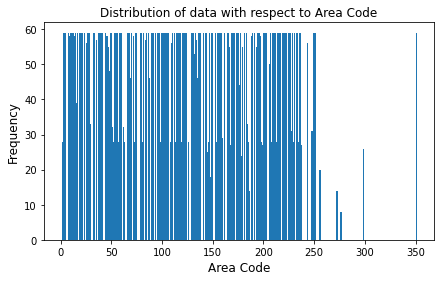

In [118]:
plt.figure(figsize=(7, 4)) 
plt.hist(Main_df9['Area Code'],  bins = 351) 
plt.xlabel('Area Code', size=12) 
plt.ylabel('Frequency', size=12)
plt.title('Distribution of data with respect to Area Code')
plt.show()

As seen above there is wide space between area codes from 300 to 350 approx. These area codes might be related to newly formed countries with no data available. Interestingly China was assigned Area code 351. There is a possibility that the data related to China was added in recent times with the subsequent code assignment.

Plotting a histogram for the 'Year' column.

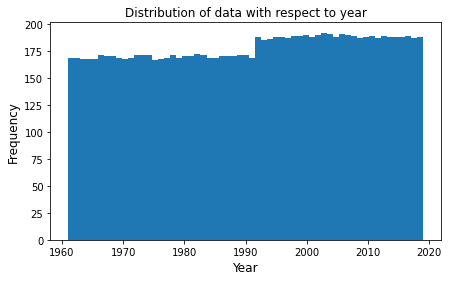

In [117]:
plt.figure(figsize=(7, 4)) 
plt.hist(Main_df9['Year'],  bins = 59) 
plt.xlabel('Year', size=12) 
plt.ylabel('Frequency', size=12)
plt.title('Distribution of data with respect to year')
plt.show()

As seen, FAO increased the data collection after year 1991. FAO also added additional variables to their raw database, some of these variables (i.e. agricultural emissions, insecticide and pesticide use) were planned to be integrated into the the current study's final dataset, however, it this tended to reduce the number of rows and thus were not integrated.

Observing the trends for 'Temperature Change' by plotting histogram.

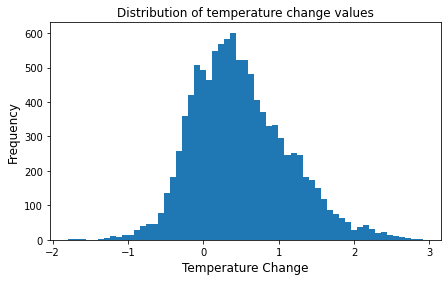

In [119]:
plt.figure(figsize=(7,4)) 
plt.hist(Main_df9['Temperature Change (°C)'],  bins = 59) 
plt.xlabel('Temperature Change', size=12) 
plt.ylabel('Frequency', size=12) 
plt.title('Distribution of temperature change values')
plt.show() 

As seen the data contained in the temperature change column is normally distributed, with the majority of the data points lying above zero. Highest frequency for the concerned column occurs around 0.5 °C mark i.e. the mean temperature change around the world for time period from 1961 to 2019.

Plotting the mean temperature change of the world with respect to year column.

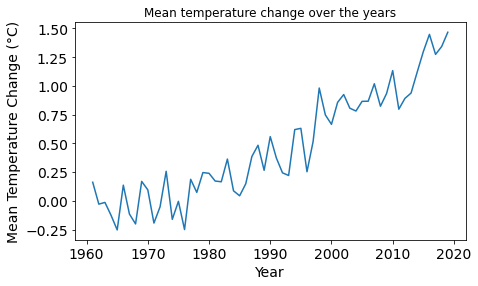

In [120]:
plt.figure(figsize=(7,4))
plt.plot(Main_df9.groupby('Year').mean()[['Temperature Change (°C)']])
plt.title('Temperature Change (°C) Vs Year')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Temperature Change (°C)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Mean temperature change over the years')
plt.show()

As observed on average the temperature of the world has increased by 1.50 degrees, which can be quite significant to influence crop yield.

Looking at the temperature change trends with respect to countries.

In [ ]:
Top_temp = Main_df9.groupby('Area').mean()['Temperature Change (°C)'].sort_values(ascending=False)
Top_temp = pd.DataFrame(Top_temp)
Top_temp = Top_temp .reset_index()
Top_temp.rename(columns={ Top_temp.columns[1]: "Mean Temperature Change (°C)" }, inplace = True)
Top_temp

,Area,Mean Temperature Change (°C)
0,Serbia,1.525643
1,Montenegro,1.489286
2,Luxembourg,1.482850
3,Slovenia,1.455036
4,Estonia,1.425571
...,...,...
199,Ethiopia PDR,0.134688
200,Solomon Islands,0.117214
201,Niue,0.056621
202,Yugoslav SFR,0.036548


Plotting the above table and restricting the result to top 10 countries.

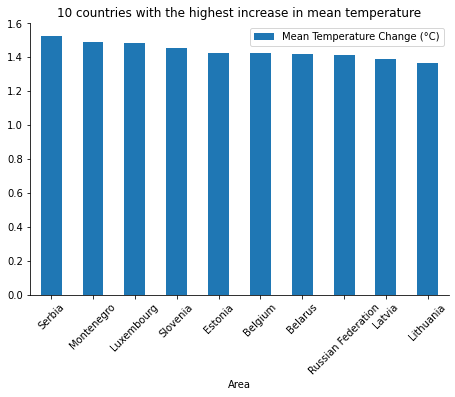

In [ ]:
fig, ax = plt.subplots(figsize=(0.75*10, 5))
Top_temp.sort_values(by="Mean Temperature Change (°C)", ascending=False).head(10)\
        .set_index("Area")\
        .plot(kind="bar", rot=45, ax=ax)
sns.despine()
plt.title("10 countries with the highest increase in mean temperature")
plt.show()

As seen, the top 10 countries having the most increase in the mean temperature change are from Europe.

Plotting the bottom 10 countries when it comes to mean temperature change.

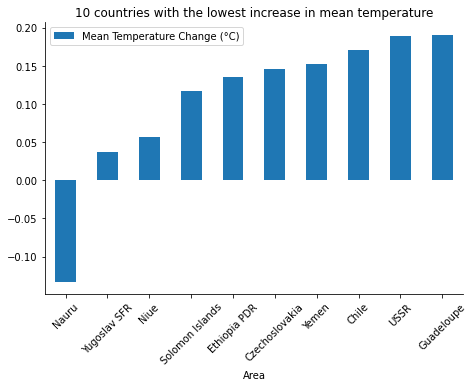

In [ ]:
fig, ax = plt.subplots(figsize=(0.75*10, 5))
Top_temp.sort_values(by="Mean Temperature Change (°C)", ascending=True).head(10)\
        .set_index("Area")\
        .plot(kind="bar", rot=45, ax=ax)
sns.despine()
plt.title("10 countries with the lowest increase in mean temperature")
plt.show()

As seen above there is only one country i.e. Nauru, that tends to have a negative mean temperature change for the observed time period.

Observing yield statistics obtained for various crops with respect to year.

<Figure size 432x288 with 0 Axes>

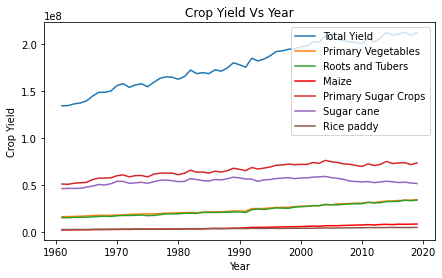

In [ ]:
fig = plt.figure()
plt.figure(figsize=(7,4)) 
plt.plot(Main_df9.groupby('Year').sum()[['Total Yield (hg/ha)']], label = 'Total Yield')
plt.plot(Main_df9.groupby('Year').sum()[['Primary Vegetables Yield (hg/ha)']], label = 'Primary Vegetables')
plt.plot(Main_df9.groupby('Year').sum()[['Total Roots and Tubers Yield (hg/ha)']], label = 'Roots and Tubers')
plt.plot(Main_df9.groupby('Year').sum()[['Maize Yield (hg/ha)']], color='red', label = 'Maize')
plt.plot(Main_df9.groupby('Year').sum()[['Primary Sugar Crops Yield (hg/ha)']], label = 'Primary Sugar Crops')
plt.plot(Main_df9.groupby('Year').sum()[['Sugar cane Yield (hg/ha)']], label = 'Sugar cane')
plt.plot(Main_df9.groupby('Year').sum()[['Rice paddy Yield (hg/ha)']], label = 'Rice paddy')

plt.legend()
plt.title('Crop Yield Vs Year')
plt.xlabel('Year')
plt.ylabel('Crop Yield')
plt.show()

Overall world's crop yield saw an increase over the years. The sugar crops tend to be the highest contributor when considering the total yield statistic.

Lets have a look at the top ten countries having the the highest total yield.

In [ ]:
Area_highest_yield = Main_df9.groupby(['Area'])['Total Yield (hg/ha)'].sum()
Area_highest_yield = Area_highest_yield.sort_values(ascending=False)
Area_highest_yield.head(10)

Area
Peru                         1.661763e+08
Egypt                        1.479818e+08
Australia                    1.315618e+08
Eswatini                     1.305953e+08
United States of America     1.296492e+08
Malawi                       1.276585e+08
Guatemala                    1.225561e+08
Zambia                       1.212724e+08
Zimbabwe                     1.202337e+08
China, Taiwan Province of    1.193954e+08
Name: Total Yield (hg/ha), dtype: float64

As seen above, Peru has the highest yield among all the counties in the world. This might to due to the fact that Peru is a tropical country and tends occupy part of amazon rain forests. Further, agricultural productivity growth has been very robust in Peru's coastal region, where large-scale farms produce various crops [1]. One can also see a lot of african countries in the top 10 list, pointing that these countries might have similar climatic conditions.

Filtering out the dataset 'Main_df9' based on the above mentioned countries.

In [ ]:
Area_highest_yield2 = Main_df9.loc[(Main_df9['Area'] == 'Peru') | (Main_df9['Area'] == 'Egypt') | (Main_df9['Area'] == 'Australia') | (Main_df9['Area'] == 'Eswatini') | (Main_df9['Area'] == 'United States of America') | (Main_df9['Area'] == 'Malawi') | (Main_df9['Area'] == 'Guatemala') | (Main_df9['Area'] == 'Zambia') | (Main_df9['Area'] == 'Zimbabwe') | (Main_df9['Area'] == 'China, Taiwan Province of')]
Area_highest_yield2

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),...,Manure applied to soil - N content (kg),Nitrogen Usage (Tonnes),Phosphate Usage (Tonnes),Potash Usage (Tonnes),Atmospheric Deposition (tonnes),Biological Fixation (tonnes),Crop Removal (tonnes),Roundwood Production (m3),Total Population (X 1000),Temperature Change (°C)
389,10,Australia,1961,641089.0,63571.0,100846.140536,459513.0,37344.0,123048.682519,9149882.0,...,9.255149e+07,35017.0,587847.0,47886.0,31656.5559,2260.60,211431.1643,14138000.0,10445.837,0.151
390,10,Australia,1962,656717.0,63397.0,103588.024670,536176.0,38409.0,139596.448749,11143648.0,...,9.560628e+07,43800.0,570322.0,37816.0,34444.2056,1956.63,256904.0171,13336000.0,10643.417,0.111
391,10,Australia,1963,659995.0,65291.0,101085.141903,679009.0,46229.0,146879.447966,11812267.0,...,9.620462e+07,70200.0,618355.0,60237.0,34411.8992,1961.61,270424.3565,13728000.0,10845.178,-0.122
392,10,Australia,1964,683471.0,60752.0,112501.810640,572725.0,41450.0,138172.496984,13001568.0,...,9.723163e+07,64000.0,846445.0,60756.0,36734.7842,2302.71,300214.8970,14302000.0,11065.415,-0.042
393,10,Australia,1965,718383.0,65597.0,109514.611949,518005.0,35781.0,144770.967832,9684056.0,...,9.763657e+07,70000.0,953550.0,62685.0,39308.6127,1317.06,229940.2571,14209000.0,11313.195,0.114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,181,Zimbabwe,2015,226489.0,34067.0,66483.400358,284140.0,64226.0,44240.650204,800286.0,...,1.520726e+07,42600.0,23000.0,13000.0,18855.9000,6420.84,28149.5661,9744786.0,13814.629,1.226
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746,676748.0,...,1.655674e+07,58100.0,39000.0,33200.0,18855.9000,6500.15,26201.6590,9806850.0,14030.331,1.470
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451,1748001.0,...,1.395568e+07,65000.0,41400.0,40000.0,18855.9000,7971.18,32794.6510,9801056.0,14236.595,0.443
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426,1777331.0,...,1.357950e+07,50100.0,45800.0,36900.0,18855.9000,9717.04,31543.9736,9920009.0,14438.802,0.747


Looking at the yearly yield trends for the above mentioned countries.

Text(0.5, 0.98, 'Plots for top 10 most yield producting countries with respect to year')

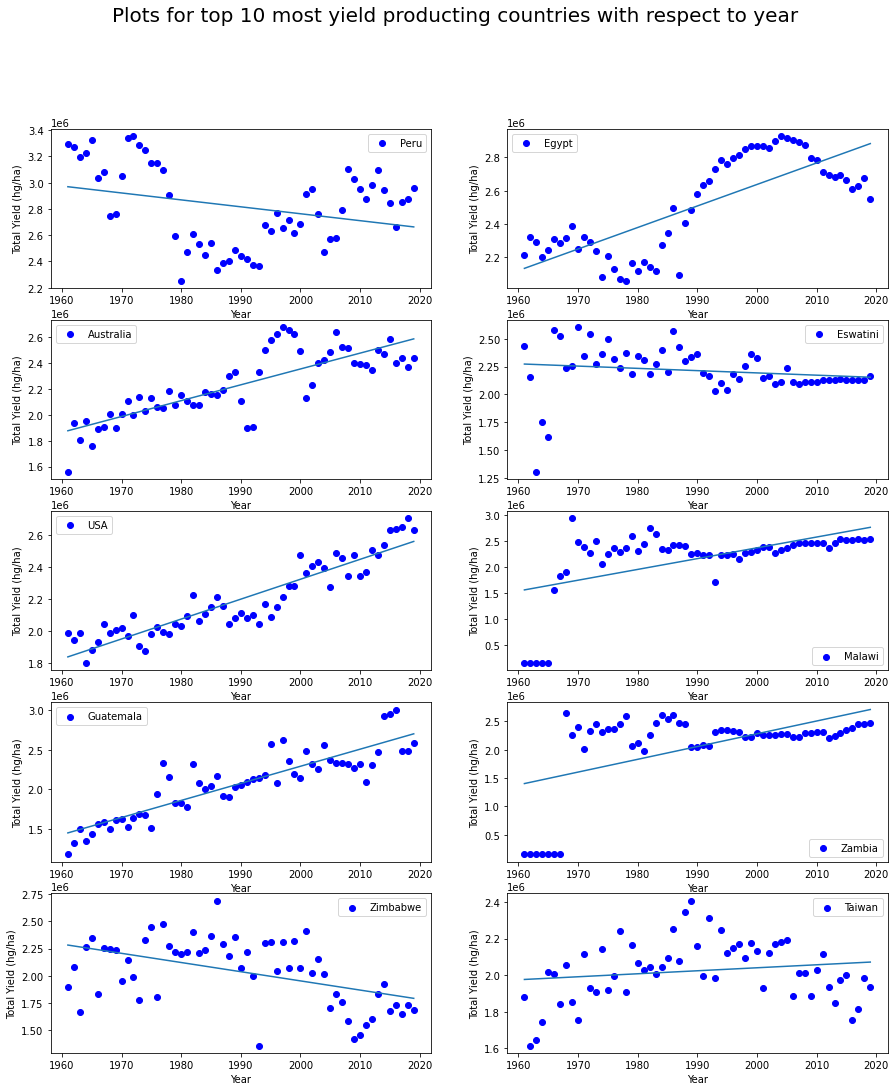

In [ ]:
plt.subplots(5, 2, figsize=(15, 17))
plt.subplot(5, 2, 1)
Peru = Area_highest_yield2.loc[(Area_highest_yield2['Area'] == 'Peru')]
plt.scatter(Peru["Year"], Peru["Total Yield (hg/ha)"], color="blue")
plt.legend(['Peru'])
m, b = np.polyfit(Peru["Year"], Peru["Total Yield (hg/ha)"], 1)
plt.plot(Peru["Year"], m*Peru["Year"] + b)
plt.xlabel('Year') 
plt.ylabel('Total Yield (hg/ha)') 

plt.subplot(5, 2, 2)
Egypt = Area_highest_yield2.loc[(Area_highest_yield2['Area'] == 'Egypt')]
plt.scatter(Egypt["Year"], Egypt["Total Yield (hg/ha)"], color="blue")
plt.legend(['Egypt'])
m, b = np.polyfit(Egypt["Year"], Egypt["Total Yield (hg/ha)"], 1)
plt.plot(Egypt["Year"], m*Egypt["Year"] + b)
plt.xlabel('Year') 
plt.ylabel('Total Yield (hg/ha)') 

plt.subplot(5, 2, 3)
Australia = Area_highest_yield2.loc[(Area_highest_yield2['Area'] == 'Australia')]
plt.scatter(Australia["Year"], Australia["Total Yield (hg/ha)"], color="blue")
plt.legend(['Australia'])
m, b = np.polyfit(Australia["Year"], Australia["Total Yield (hg/ha)"], 1)
plt.plot(Australia["Year"], m*Australia["Year"] + b)
plt.xlabel('Year') 
plt.ylabel('Total Yield (hg/ha)') 

plt.subplot(5, 2, 4)
Eswatini = Area_highest_yield2.loc[(Area_highest_yield2['Area'] == 'Eswatini')]
plt.scatter(Eswatini["Year"], Eswatini["Total Yield (hg/ha)"], color="blue")
plt.legend(['Eswatini'])
m, b = np.polyfit(Eswatini["Year"], Eswatini["Total Yield (hg/ha)"], 1)
plt.plot(Eswatini["Year"], m*Eswatini["Year"] + b)
plt.xlabel('Year') 
plt.ylabel('Total Yield (hg/ha)')

plt.subplot(5, 2, 5)
USA = Area_highest_yield2.loc[(Area_highest_yield2['Area'] == 'United States of America')]
plt.scatter(USA["Year"], USA["Total Yield (hg/ha)"], color="blue")
plt.legend(['USA'])
m, b = np.polyfit(USA["Year"], USA["Total Yield (hg/ha)"], 1)
plt.plot(USA["Year"], m*USA["Year"] + b)
plt.xlabel('Year') 
plt.ylabel('Total Yield (hg/ha)')

plt.subplot(5, 2, 6)
Malawi = Area_highest_yield2.loc[(Area_highest_yield2['Area'] == 'Malawi')]
plt.scatter(Malawi["Year"], Malawi["Total Yield (hg/ha)"], color="blue")
plt.legend(['Malawi'])
m, b = np.polyfit(Malawi["Year"], Malawi["Total Yield (hg/ha)"], 1)
plt.plot(Malawi["Year"], m*Malawi["Year"] + b)
plt.xlabel('Year') 
plt.ylabel('Total Yield (hg/ha)')

plt.subplot(5, 2, 7)
Guatemala = Area_highest_yield2.loc[(Area_highest_yield2['Area'] == 'Guatemala')]
plt.scatter(Guatemala["Year"], Guatemala["Total Yield (hg/ha)"], color="blue")
plt.legend(['Guatemala'])
m, b = np.polyfit(Guatemala["Year"], Guatemala["Total Yield (hg/ha)"], 1)
plt.plot(Guatemala["Year"], m*Guatemala["Year"] + b)
plt.xlabel('Year') 
plt.ylabel('Total Yield (hg/ha)')

plt.subplot(5, 2, 8)
Zambia = Area_highest_yield2.loc[(Area_highest_yield2['Area'] == 'Zambia')]
plt.scatter(Zambia["Year"], Zambia["Total Yield (hg/ha)"], color="blue")
plt.legend(['Zambia'])
m, b = np.polyfit(Zambia["Year"], Zambia["Total Yield (hg/ha)"], 1)
plt.plot(Zambia["Year"], m*Zambia["Year"] + b)
plt.xlabel('Year') 
plt.ylabel('Total Yield (hg/ha)')

plt.subplot(5, 2, 9)
Zimbabwe = Area_highest_yield2.loc[(Area_highest_yield2['Area'] == 'Zimbabwe')]
plt.scatter(Zimbabwe["Year"], Zimbabwe["Total Yield (hg/ha)"], color="blue")
plt.legend(['Zimbabwe'])
m, b = np.polyfit(Zimbabwe["Year"], Zimbabwe["Total Yield (hg/ha)"], 1)
plt.plot(Zimbabwe["Year"], m*Zimbabwe["Year"] + b)
plt.xlabel('Year') 
plt.ylabel('Total Yield (hg/ha)')

plt.subplot(5, 2, 10)
Taiwan = Area_highest_yield2.loc[(Area_highest_yield2['Area'] == 'China, Taiwan Province of')]
plt.scatter(Taiwan["Year"], Taiwan["Total Yield (hg/ha)"], color="blue")
plt.legend(['Taiwan'])
m, b = np.polyfit(Taiwan["Year"], Taiwan["Total Yield (hg/ha)"], 1)
plt.plot(Taiwan["Year"], m*Taiwan["Year"] + b)
plt.xlabel('Year') 
plt.ylabel('Total Yield (hg/ha)')
plt.suptitle('Plots for top 10 most yield producting countries with respect to year',fontsize=20)

As seen majority of the high yield producing countries have seen an a yearly increasing trend. However there are countries that have seen a steady decline in annual crop yield over the years. At present Egypt is noticed to have the highest crop yield in the entire world.

Plotting box plots for the above mentioned countries.

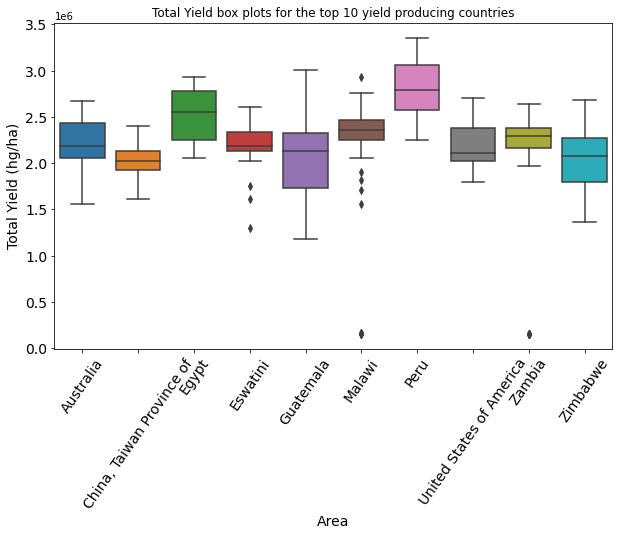

In [121]:
plt.figure(figsize=(10,6)) 
sns.boxplot(x='Area', y='Total Yield (hg/ha)', data=Area_highest_yield2) 
plt.xticks(rotation=55) 
plt.xlabel('Area', fontsize=14) 
plt.ylabel('Total Yield (hg/ha)', fontsize=14) 
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)
plt.title('Total Yield box plots for the top 10 yield producing countries')
plt.show()

As seen above, there are only three countries with outliers i.e. Eswatini, Malawi and Zambia. On the other hand, Guatemala had the highest inter-quartile range with a skewed data distribution.

Looking at the livestock unit growth over the years.

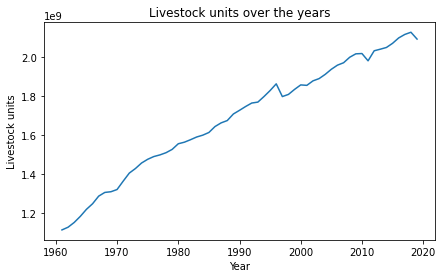

In [122]:
plt.figure(figsize=(7,4)) 
plt.plot(Main_df9.groupby('Year').sum()[['Livestock units']])
plt.title('Livestock units Vs Year')
plt.xlabel('Year')
plt.ylabel('Livestock units')
plt.title('Livestock units over the years')
plt.show()

A seen, there is a steady increase in the population of the livestock.

Summing up the manure applied statistic and plotting it on yearly basis.

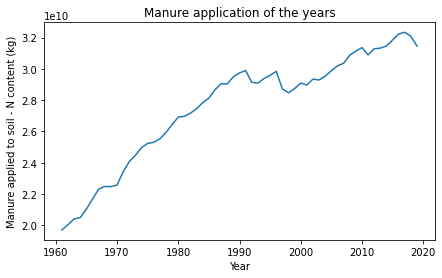

In [123]:
plt.figure(figsize=(7,4)) 
plt.plot(Main_df9.groupby('Year').sum()[['Manure applied to soil - N content (kg)']])
plt.title('Manure applied to soil - N content (kg) Vs Year')
plt.xlabel('Year')
plt.ylabel('Manure applied to soil - N content (kg)')
plt.title('Manure application of the years')
plt.show()

As seen above there is an increase in the use of animal manure over the years. A hump around 1990 is clearly visible.

Visualizing the world's fertilizer use based on the nutrient type involved.

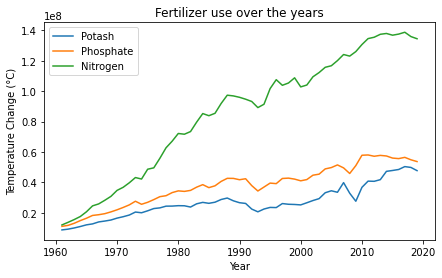

In [124]:
plt.figure(figsize=(7,4)) 
plt.plot(Main_df9.groupby('Year').sum()[['Potash Usage (Tonnes)']], label = 'Potash')
plt.plot(Main_df9.groupby('Year').sum()[['Phosphate Usage (Tonnes)']], label = 'Phosphate')
plt.plot(Main_df9.groupby('Year').sum()[['Nitrogen Usage (Tonnes)']], label = 'Nitrogen')

plt.title('Fertilizer Usage Vs Year')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.title('Fertilizer use over the years')
plt.show()

As seen above, nitrogen based fertilizers are the most commonly used ones. On the other hand, potash based fertilizers are the least utilized ones. Overall the use of fertilizer has increased in the world. It is important to note that there hump between year 1985 and 1990 signifying an increase usage of fertilizer. This hump coincides with the hump seen the case of manure use.

Looking the population increase on yearly basis.

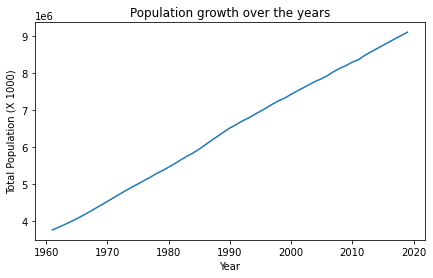

In [125]:
plt.figure(figsize=(7,4)) 
plt.plot(Main_df9.groupby('Year').sum()[['Total Population (X 1000)']])
plt.title('Total Population (X 1000) Vs Year')
plt.xlabel('Year')
plt.ylabel('Total Population (X 1000)')
plt.title('Population growth over the years')
plt.show()

As seen, earth's population is increasing in a linear fashion. This trend can have both negative as well as positive effect on crop yield as increased population means increased labor force whereas on the other and it can also reduce the agricultural land used for crop cultivation.

Looking for yearly trends in the case of roundwoood produciton.

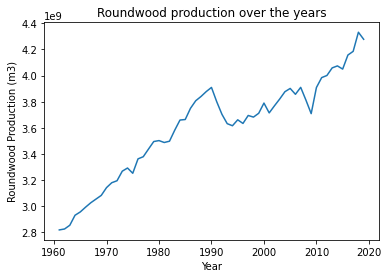

In [126]:
plt.plot(Main_df9.groupby('Year').sum()[['Roundwood Production (m3)']])
plt.title('Roundwood Production (m3) Vs Year')
plt.xlabel('Year')
plt.ylabel('Roundwood Production (m3)')
plt.title('Roundwood production over the years')
plt.show()

Overall an increase in the roundwood production can be seen on yearly basis. This might be a good sign as increased roundwood production might mean more suitable environment for tree and crop growth. However, one needs to check what kind of relationship the roundwood production and crop growth have by means of model fitting and interpretation.

### Data Selection for Modelling

Since the dataset contain columns on the basis of which crop yield is calculated i.e. individual crop related columns, area harvested column and production column, therefore, it is recommended to construct a dataframe without the above specified columns as it would render future modelling steps meaningless.

Excluding statistics related to individual crops from the processed dataset.

In [128]:
Main_df10 = Main_df9[['Area Code', 'Area', 'Year', 'Livestock units',
       'Manure applied to soil - N content (kg)', 'Nitrogen Usage (Tonnes)',
       'Phosphate Usage (Tonnes)', 'Potash Usage (Tonnes)',
       'Atmospheric Deposition (tonnes)', 'Biological Fixation (tonnes)',
       'Crop Removal (tonnes)', 'Roundwood Production (m3)',
       'Total Population (X 1000)', 'Temperature Change (°C)', 'Total Yield (hg/ha)']]
Main_df10

,Area Code,Area,Year,Livestock units,Manure applied to soil - N content (kg),Nitrogen Usage (Tonnes),Phosphate Usage (Tonnes),Potash Usage (Tonnes),Atmospheric Deposition (tonnes),Biological Fixation (tonnes),Crop Removal (tonnes),Roundwood Production (m3),Total Population (X 1000),Temperature Change (°C),Total Yield (hg/ha)
0,2,Afghanistan,1961,5257236.40,5.624520e+07,1000.0,100.0,0.0,65189.7400,0.00,74154.2000,1354291.0,9169.410,-0.121,5.831727e+05
1,2,Afghanistan,1962,5259200.50,5.704647e+07,1000.0,100.0,0.0,67127.8800,0.00,75966.9064,1371568.0,9351.441,-0.171,6.065209e+05
2,2,Afghanistan,1963,5471475.75,5.859424e+07,1000.0,100.0,0.0,68986.5110,0.00,71302.8675,1414937.0,9543.205,0.841,6.053449e+05
3,2,Afghanistan,1964,5597970.00,5.980591e+07,1000.0,100.0,0.0,70987.6918,0.00,76253.3200,1533399.0,9744.781,-0.779,5.682812e+05
4,2,Afghanistan,1965,5734080.00,6.162054e+07,1000.0,100.0,0.0,72446.0625,0.00,77364.1100,1596956.0,9956.320,-0.254,6.088503e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,181,Zimbabwe,2015,3529759.20,1.520726e+07,42600.0,23000.0,13000.0,18855.9000,6420.84,28149.5661,9744786.0,13814.629,1.226,1.678980e+06
11051,181,Zimbabwe,2016,3557201.40,1.655674e+07,58100.0,39000.0,33200.0,18855.9000,6500.15,26201.6590,9806850.0,14030.331,1.470,1.728082e+06
11052,181,Zimbabwe,2017,3518697.90,1.395568e+07,65000.0,41400.0,40000.0,18855.9000,7971.18,32794.6510,9801056.0,14236.595,0.443,1.654091e+06
11053,181,Zimbabwe,2018,3556852.90,1.357950e+07,50100.0,45800.0,36900.0,18855.9000,9717.04,31543.9736,9920009.0,14438.802,0.747,1.734386e+06


Checking the dataset for co-linearity.

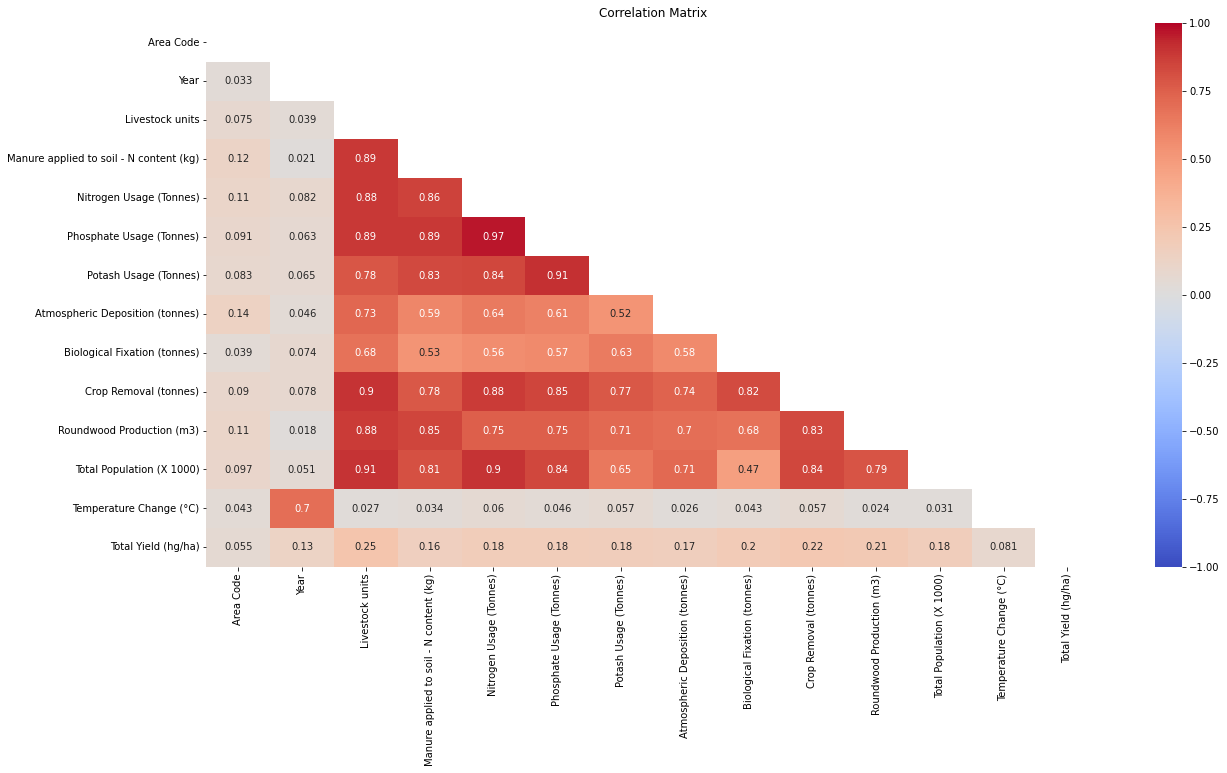

In [130]:
# find the correlation between the variables
corr = Main_df10.corr()
 
# plot the correlation matrix using a heatmap
plt.figure(figsize=(20,10))
matrix = np.triu(Main_df10.corr())
sns.heatmap(corr, annot=True, mask=matrix, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Correlation Matrix')
plt.show()

As seen strong co-linearity exists between various parameters e.g. between Livestock units and fertilizer nutrients applied (i.e. Potash usage, Phosphate usage and Nitrogen Usage). It the dataset will be kept as it is and used for model fitting, however, the strong co-linearity between various parameters will be kept in mind.

The table below provides a description of all the columns included in the final dataset (ready for model implementation) for the guidance of the readers.

|Column Name|Description|
|---|----|
|Area Code|Contains codes specific to individual countries starting from 1 to 351.|
|Area|Mentions names of 180 different countries.|
|Year|Mentions years ranging from 1961 to 2019.|
|Livestock units|Mentions the number of farm animals considered to be an asset.|
|Manure applied to soil - N content (kg)|Mentions the total amount of plant and animal wastes in kilograms that are applied t as sources of plant nutrients.|
|Nitrogen Usage (Tonnes)|Mentions the total amount of nitrogen nutrient based fertilizers used in tonnes.|
|Phosphate Usage (Tonnes)|Mentions the total amount of phosphate nutrient based fertilizers used in tonnes.|
|Potash Usage (Tonnes)|Mentions the total amount of potash nutrient based fertilizers used in tonnes.|
|Atmospheric Deposition (tonnes)|Provides statistics related to the deposition (in tonnes) of particles, aerosols, and gases from atmosphere to the earth's surface via precipitation (rain, snow, fog).|
|Biological Fixation (tonnes)|Provides statistics related to the total amount (in tonnes) of nitrogen gas (present in the atmosphere) incorporated into plant tissues.|
|Crop Removal (tonnes)|Provides statistics related the total amount of plant nutrient removed from the field in the harvested portion of the crop (e.g., grain, silage, hay).|
|Roundwood Production (m3)|Deals with the quantities of wood (in m3) removed from the forest and other wooded land, and trees outside the forest.|
|Total Population (X 1000)|Mentions total number of humans living in X 1000 units.|
|Temperature Change (°C)|Mentions the change in temperature in degree celsius.|
|Total Yield (hg/ha)|Mentions the total yield for top six crops in hectogram per hectare. This is the target variable.|

It is important to note that all the statistics mentioned in the dataset starting from 'Livestock units' to 'Total Yield' are mentioned for individual countries on yearly basis.

Exporting the combined dataset to a folder containing refined/filtered data and working files, ready to be fed for model fitting.

In [ ]:
Main_df10.to_csv(r'DataFiles/02-RefinedDataFiles/CombinedandRefinedDataFrame.csv', index = False)

### Conclusion:

Refined datasets were combined with the combined dataset addressed for null values. Later, basic EDA was carried out. Overall, an increase in various parameters was observed. On average, positive temperature change was observed for the world, with countries in Europe showing the highest temperature changes. When filtering data for countries with the highest crop yield it was revealed that majority of them is situated in Africa. Co-linearity occurs among various independent variables. This trend will be kept in mind when implementing various models on the final dataset.

### References:

[1] As Peru's agricultural production grows, smallholders long for better markets [Internet]. World Bank Blogs. [cited 2022Apr4]. Available from: https://blogs.worldbank.org/latinamerica/peru-s-agricultural-production-grows-smallholders-long-better-markets 